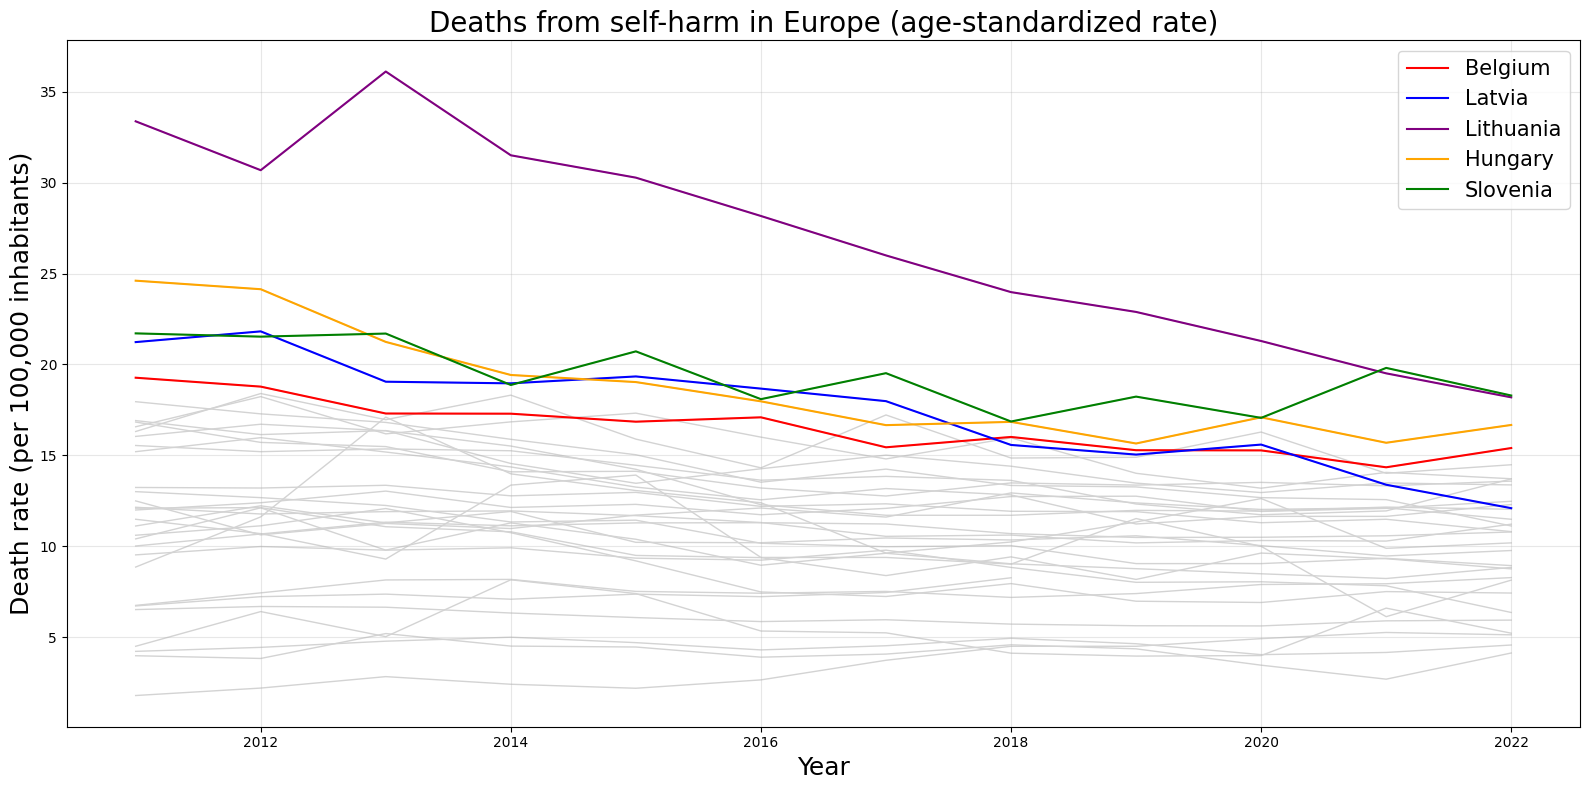

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file
file_path = "Dataset\deaths-self-harm-eu.csv"  # cambia percorso se necessario
df = pd.read_csv(file_path)

# Seleziono colonne utili
df_sel = df[["TIME_PERIOD", "Geopolitical entity (reporting)", "OBS_VALUE"]].copy()

# Converto i valori in numerici
df_sel["OBS_VALUE"] = pd.to_numeric(df_sel["OBS_VALUE"], errors="coerce")

# Pivot per avere anni come indice e paesi come colonne
df_pivot = df_sel.pivot(
    index="TIME_PERIOD",
    columns="Geopolitical entity (reporting)",
    values="OBS_VALUE"
)

# Lista dei paesi da evidenziare
highlight_countries = [ "Belgium", "Latvia","Lithuania","Hungary","Slovenia" ]

plt.figure(figsize=(16, 8))

# Disegno prima tutte le linee in grigio
for country in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[country], color="lightgray", linewidth=1, zorder=1)

# Disegno le linee evidenziate
colors = ["red", "blue", "purple","orange","green", ] 
for country, color in zip(highlight_countries, colors):
    if country in df_pivot.columns:
        plt.plot(df_pivot.index, df_pivot[country], label=country, color=color, linewidth=1.5, zorder=2)

plt.title("Deaths from self-harm in Europe (age-standardized rate)", fontsize= 20)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Death rate (per 100,000 inhabitants)", fontsize=18)
plt.legend(fontsize=15)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()